<center>
  <a href="2.14-Project%20Logistic%20Regression.ipynb.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.17-Mini-Project Regression.ipynb">Mini Project: Regression</a></center>
</center>

# 2.16 Example of Linear Regression using MPG Data

In [57]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics


#### Read from a CSV file

In [58]:
mtcars=pd.read_csv('cars.csv')

In [101]:
mtcars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Color
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,blue
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,red
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,blue
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,green
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,red


In [59]:
mtcars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#### Check the features (variables)

In [60]:
mtcars.columns.shape

(10,)

In [61]:
mtcars.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin', 'Color'],
      dtype='object')

#### We want to test whether *weight* can predict *MPG* (Miles per gallon)
#### Visualise the relationship

<AxesSubplot:xlabel='Displacement', ylabel='MPG'>

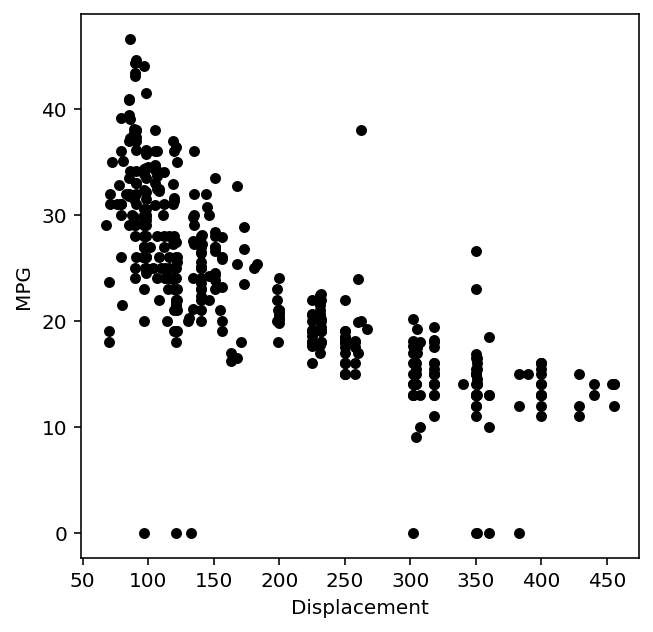

In [214]:
mtcars.plot(kind="scatter",
           x="Displacement",
           y="MPG",
           figsize=(5,5),
           color="black")

#### The scatterplot results indicate a negative linear relationship between weight and mpg, indicating a linear regression model should work well.


##  5 Steps of Applying Scikit-Learn estimator API

 1. Choose Model
 2. Choose model hyperparameters
 3. Arrange Data into a features matrix and target vector
 4. Fit the model
 5. Apply the model


### -1st Step: Choose model 

import the LinearRegression model from sklearn

In [63]:
from sklearn.linear_model import LinearRegression

### -2nd Step: Choose Hyperparameter

#### Creating an instance of Logistic Regression Algorithm (Initialising Model) using fit_intercept

In [64]:
regression_model = LinearRegression(fit_intercept=True)


#### Confirming the parameters

In [65]:
regression_model

LinearRegression()

### -3rd Step: Arrange Data into a Features Matrix and Target Vector

#### Setup the X and the y variables

In [99]:
mtcars.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin', 'Color'],
      dtype='object')

In [331]:
# X=mtcars[['Weight']]
X1=mtcars[['Weight']]
X2=mtcars[['Displacement']]
X3=mtcars[['Horsepower']]
X4=mtcars[['Acceleration']]
y=mtcars.MPG
y.shape
# X = X1.merge(X2,left_index=True, right_index=True)
# X = X2
X = mtcars.iloc[:,[3,4,5,6]]
# X = X1 + X2 + X3 + X4
# np.all(np.isnan(X.Acceleration))
# X2.shape
X

,Displacement,Horsepower,Weight,Acceleration
0,307.0,130,3504,12.0
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0
4,302.0,140,3449,10.5
...,...,...,...,...
401,140.0,86,2790,15.6
402,97.0,52,2130,24.6
403,135.0,84,2295,11.6
404,120.0,79,2625,18.6


#### Split the data so that the train data has 70% and test 30%

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=0)
X_train.shape

(284, 4)

### -4th Step: Fit the model to your data

#### Put the instance of the regression (i.e., *regression_model*), calling the *fit* method to ***train*** the model with the training dataset

In [310]:
# Training the model 
regression_model.fit(X_train,y_train)

LinearRegression()

### -5th Step: Predict labels for unknown (unseen) data

#### Predict the y-value for the test dataset and put the result matrix in y_pred

In [340]:
y_pred = regression_model.predict(X_test)
y_pred.shape
X_test.shape
# X_test1 = X_test.values.reshape(-1,1)


(122, 4)

ValueError: x and y must be the same size

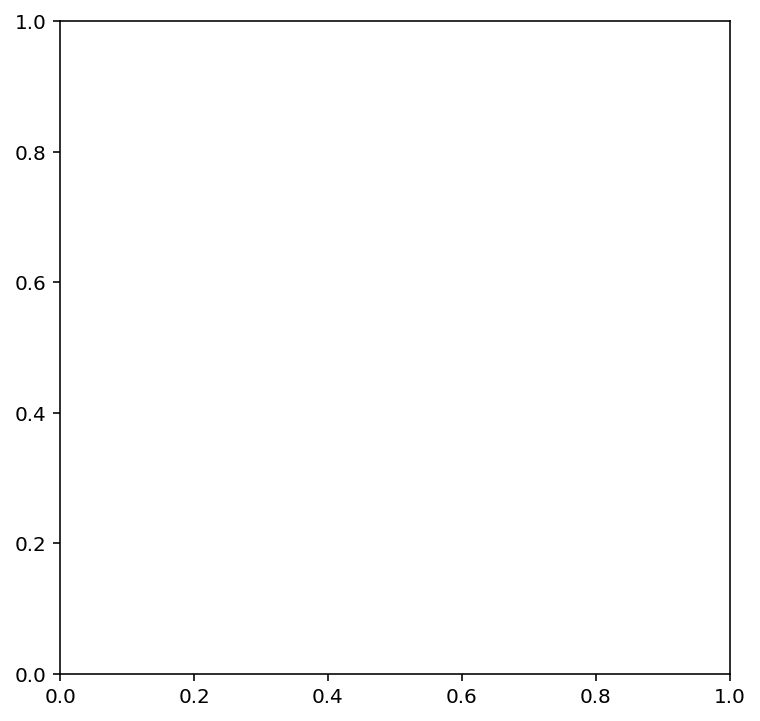

In [337]:
# plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test)
# plt.plot(X_test.Displacement,y_pred,color='black')
# X_test = X_test.values.reshape(-1,1)
# plt.plot(X_test,y_pred,color='black')
plt.show()

### Performance Metrics

#### -Mean Absolute Error

In [313]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.149971356268109

#### -Mean Squared Error

In [314]:

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

35.94921395916775

#### -Root Mean Squared Error

In [315]:
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

5.995766336271599

#### Check the explained variance

In [316]:
regression_model.score(X_train, y_train)

0.6597089245805886

In [317]:
regression_model.score(X_test, y_test)

0.5884135510519408

#### Getting the residuals /errors.
-Predict the y-value for the test dataset and put the result matrix in all_prediction
- True values minus prediction values = residuals 

In [318]:
all_prediction = regression_model.predict(X_test)
all_prediction.shape

(122,)

In [319]:
# Actual - prediction = residuals of the train dataset
residuals = y_test - all_prediction

residuals.describe()
residuals

175   -2.901237
239    3.176824
60    -0.435145
231    0.564746
134   -3.698143
         ...   
96    -0.722906
145    1.239340
89    -3.277820
364    7.182855
21    -1.698281
Name: MPG, Length: 122, dtype: float64

#### Visualise the residuals

<AxesSubplot:xlabel='preds', ylabel='residuals'>

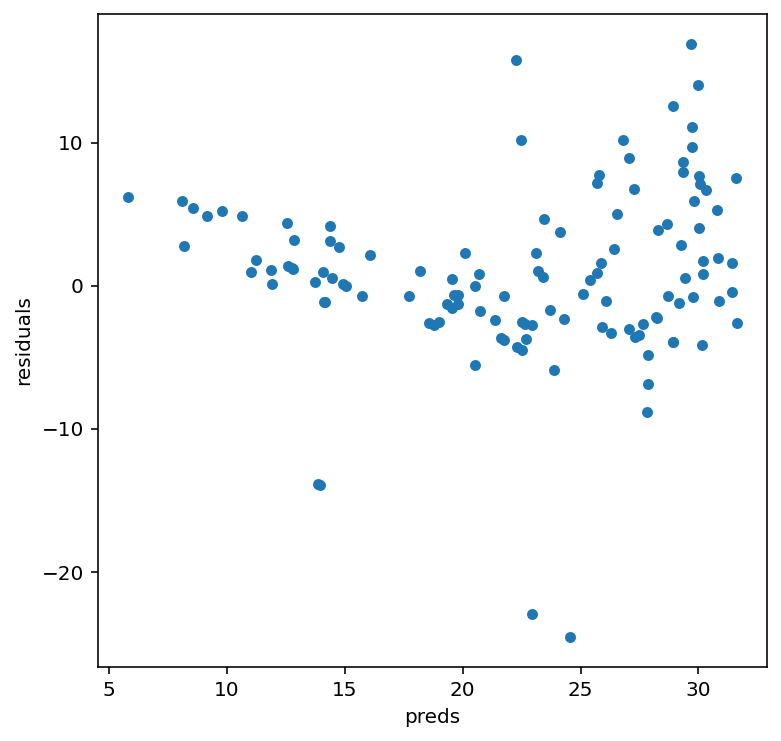

In [320]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":y_pred, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

#### Beta Coefficient and Model Intercept

In [321]:
# Check the trained model y-intercept
print(regression_model.intercept_)

# Check the trained model coefficients
print(regression_model.coef_)

42.281724942485795
[-0.01579483 -0.03457863 -0.00437832  0.0150119 ]


The results indicate the model intercept and coefficients used to create the best fit line.
Y-intercept term is set to 45.88 and the coefficient for the weight variable is -0.008. 

That is to say, the model fit the line MPG = 45.88484- 0.00768\*Weight.



#### Statistical packages like Minitab, SAS, SPSS' Results 

In [322]:
import statsmodels.api as sm
from scipy import stats

In [194]:
X_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     258.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.84e-64
Time:                        14:16:18   Log-Likelihood:                -843.28
No. Observations:                 284   AIC:                             1693.
Df Residuals:                     281   BIC:                             1704.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5456      1.036     43.945      0.0

#### Cross Validation
CV=5

In [195]:
scores = cross_val_score(regression_model, X_test, y_test, scoring='r2',cv=5)
scores

array([0.6647611 , 0.54263308, 0.42365409, 0.61913425, 0.63290717])

In [196]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.58 (+/- 0.17)


https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-27-linear.html

<center>
  <a href="2.14-Project%20Logistic%20Regression.ipynb.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.17-Mini-Project Regression.ipynb">Mini Project: Regression</a></center>
</center>